In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
dt = 1e-4
k = 8.988e9

In [2]:
class Vector:
    def __init__(self,x,y,z):
        self.z = z
        self.y = y
        self.x = x

    def __str__(self):
        return f"Vector({self.x}, {self.y}, {self.z})"
    
    def __repr__(self):
        return f"Vector({self.x}, {self.y}, {self.z})"


    def __add__(self, other):
        if not isinstance(other,Vector):
            raise ValueError("The 'other' object must be a Vector")
        test = Vector(0,0,0)
        test.x = self.x + other.x
        test.y = self.y + other.y
        test.z = self.z + other.z
        return test

    def __sub__(self, other):
        if not isinstance(other,Vector):
            raise ValueError("The 'other' object must be a Vector")
        result_x = self.x - other.x
        result_y = self.y - other.y
        result_z = self.z - other.z
        return Vector(result_x, result_y, result_z)
    
    def __mul__(self,other):
        return Vector(self.x * other, self.y * other, self.z* other)

    def dot_product(self, other):
        if not isinstance (other, Vector):
            raise ValueError("The 'other' object must be a Vector")
        test = Vector(0,0,0)
        test.x = self.x * other.x
        test.y = self.y * other.y
        test.z = self.z * other.z
        result = test.x + test.y + test.z
        return result
    

    #just check once if the cross product is good or not for lorentz force B_force
    def cross_product(a,b):
        temp = Vector(0, 0, 0)
        temp.x = a.y * b.z - a.z * b.y
        temp.y = a.z * b.x - a.x * b.z
        temp.z = a.x * b.y - a.y * b.x
        return temp
    
    def mod(self):
        return math.sqrt(self.x**2 + self.y**2 + self.z**2)
    
    def dist(self,other):
        return math.sqrt((self.x-other.x)**2 + (self.y-other.y)**2 + (self.z-other.z)**2)

In [3]:
class Particle:
    def __init__ (self,mass,charge,pos,vel):
        self.mass = mass
        self.charge = charge
        self.pos = pos
        self.vel = vel
    
    def __str__ (self):
        return f"Particle \n Mass: {self.mass} \n Charge : {self.charge}\n Position {self.pos}\n Velocity {self.vel}"

    def __repr__ (self):
        return f"Particle \n Mass: {self.mass} \n Charge : {self.charge}\n Position {self.pos}\n Velocity {self.vel}"
    
    def update(self,tot_acc):
        self.vel += tot_acc*dt
        self.pos += self.vel*dt

In [4]:
def Lorentz (particle, E, B):
    E_force = E
    B_force = particle.vel.cross_product(B)
    tot_for = (E_force + B_force)
    tot_acc = tot_for*(particle.charge/particle.mass)
    return tot_acc

In [5]:
def Coulumb_i(a,b):
    r = a.pos.dist(b.pos)
    force = k * a.charge * b.charge/ (r ** 3)
    r_vec = a.pos - b.pos
    # print(a.pos)
    # print(b.pos)
    # print(r_vec)
    f_vec = r_vec*force
    return f_vec

In [6]:
mass = 1e-5
charge = 2e-4
pos = Vector(0.0 ,0.0 ,0.0)
vel = Vector(10.0 ,0.0 ,0.0)
par1 = Particle(mass,charge,pos,vel)
par1

Particle 
 Mass: 1e-05 
 Charge : 0.0002
 Position Vector(0.0, 0.0, 0.0)
 Velocity Vector(10.0, 0.0, 0.0)

In [7]:
mass = 1e-5
charge = 0
pos = Vector(10.0 ,0.0 ,0.0)
vel = Vector(0.0 ,0.0 ,-0.0)
par2 = Particle(mass,charge,pos,vel)
par2

Particle 
 Mass: 1e-05 
 Charge : 0
 Position Vector(10.0, 0.0, 0.0)
 Velocity Vector(0.0, 0.0, -0.0)

E = Vector(0.0 ,1e-2 ,0.0)
B = Vector(0.0 ,1e-2 ,0.0)

In [8]:
E = Vector(0.0 ,0.0 ,0.0)
B = Vector(0.0 ,10.0 ,0.0)

In [9]:
coul1 = Coulumb_i(par1,par2)
coul1

Vector(-0.0, 0.0, 0.0)

In [10]:
temp = Lorentz(par1,E,B)
temp

Vector(0.0, 0.0, 2000.0)

In [11]:
acc1 = temp + coul1
x_positions = []
y_positions = []
z_positions = []

In [12]:
coul2 = Coulumb_i(par2,par1)
coul2

Vector(0.0, 0.0, 0.0)

In [13]:
temp2 = Lorentz(par2,E,B)
temp2

Vector(0.0, 0.0, 0.0)

In [14]:
acc2 = Lorentz(par2,E,B) - coul2
x1_positions = []
y1_positions = []
z1_positions = []

In [15]:
ri = (par1.mass*par1.vel.mod())/(par1.charge*B.mod())
ti = 2*np.pi*ri/par1.vel.mod()
print("Time is :",  ti)
ri

Time is : 0.031415926535897934


0.05

In [16]:
total_time = 10
n = (int)(total_time/dt)
for i in range(n):
    par1.update(acc1)
    par2.update(acc2)
    acc1 = Lorentz(par1,E,B) + coul1
    acc2 = Lorentz(par2,E,B) + coul2
    x_positions.append(par1.pos.x)
    y_positions.append(par1.pos.y)
    z_positions.append(par1.pos.z)
    x1_positions.append(par2.pos.x)
    y1_positions.append(par2.pos.y)
    z1_positions.append(par2.pos.z)
 


In [17]:
ri = (par1.mass*par1.vel.mod())/(par1.charge*B.mod())
ti = 2*np.pi*ri/par1.vel.mod()
print("Time is :",  ti)
ri

Time is : 0.031415926535897934


24161446.303456303

In [18]:
par1

Particle 
 Mass: 1e-05 
 Charge : 0.0002
 Position Vector(23963390.99909421, 0.0, 3124882.359207408)
 Velocity Vector(-528911333.3077897, 0.0, 4803256426.684991)

In [19]:
par2

Particle 
 Mass: 1e-05 
 Charge : 0
 Position Vector(10.0, 0.0, 0.0)
 Velocity Vector(0.0, 0.0, 0.0)

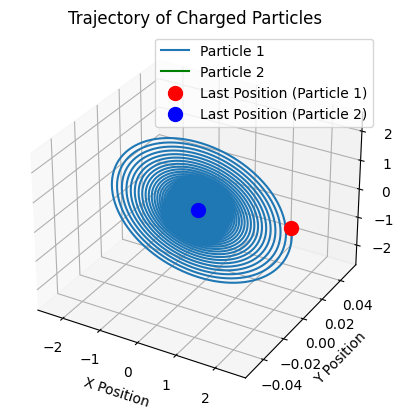

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x_positions, y_positions, z_positions, label='Particle 1')
ax.plot(x1_positions, y1_positions, z1_positions, color='green', label='Particle 2')


ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('Trajectory of Charged Particle')



last_x_position = x_positions[-1]
last_y_position = y_positions[-1]
last_z_position = z_positions[-1]

last_x1_position = x1_positions[-1]
last_y1_position = y1_positions[-1]
last_z1_position = z1_positions[-1]

ax.scatter(last_x_position, last_y_position, last_z_position, c='red', marker='o', s=100, label='Last Position (Particle 1)')
ax.scatter(last_x1_position, last_y1_position, last_z1_position, c='blue', marker='o', s=100, label='Last Position (Particle 2)')

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
ax.set_title('Trajectory of Charged Particles')

# ax.view_init(elev=0, azim=90)
ax.legend()
plt.show()








In [21]:
ax.view_init(elev=0, azim=0)
plt.show()